In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
#read data
file_path = "three_sentiments.csv"
dataset = pd.read_csv(file_path)
dataset.head()

,ID,interview_date,country,NPS,translated_comment,customer_type,comment_length,translated_comment_preprocessed,bert_sentiment,vader_sentiment,sentiment,textblob_sentiment
0,17,2022-07-01,Poland,5.0,High prices,detractors,11,high price,10,5.000,neu,5.800000
1,20,2020-11-22,Sweden,8.0,beat caught,passives,11,beat caught,2,5.000,neu,5.000000
2,29,2022-08-03,Poland,10.0,Very easy and transparent meter takeover proce...,promoters,50,easy transparent meter takeover procedure,10,7.202,pos,7.166667
3,32,2022-07-06,Poland,5.0,confusion in the name of the company,detractors,36,confusion name company,2,3.520,neg,5.000000
4,42,2022-06-23,Romania,7.0,"solving immediate problems, that is, first of ...",passives,218,solving immediate problem first malfunction oc...,6,3.194,neg,6.250000


In [3]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

dataset["tokens"] = dataset["translated_comment_preprocessed"].apply(tokenizer.tokenize)
dataset.head()

,ID,interview_date,country,NPS,translated_comment,customer_type,comment_length,translated_comment_preprocessed,bert_sentiment,vader_sentiment,sentiment,textblob_sentiment,tokens
0,17,2022-07-01,Poland,5.0,High prices,detractors,11,high price,10,5.000,neu,5.800000,"[high, price]"
1,20,2020-11-22,Sweden,8.0,beat caught,passives,11,beat caught,2,5.000,neu,5.000000,"[beat, caught]"
2,29,2022-08-03,Poland,10.0,Very easy and transparent meter takeover proce...,promoters,50,easy transparent meter takeover procedure,10,7.202,pos,7.166667,"[easy, transparent, meter, takeover, procedure]"
3,32,2022-07-06,Poland,5.0,confusion in the name of the company,detractors,36,confusion name company,2,3.520,neg,5.000000,"[confusion, name, company]"
4,42,2022-06-23,Romania,7.0,"solving immediate problems, that is, first of ...",passives,218,solving immediate problem first malfunction oc...,6,3.194,neg,6.250000,"[solving, immediate, problem, first, malfuncti..."


In [4]:
all_words = [word for tokens in dataset["tokens"] for word in tokens]
sentence_lengths = [len(tokens) for tokens in dataset["tokens"]]
VOCAB = sorted(list(set(all_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print("Max sentence length is %s" % max(sentence_lengths))

297177 words total, with a vocabulary size of 10074
Max sentence length is 259


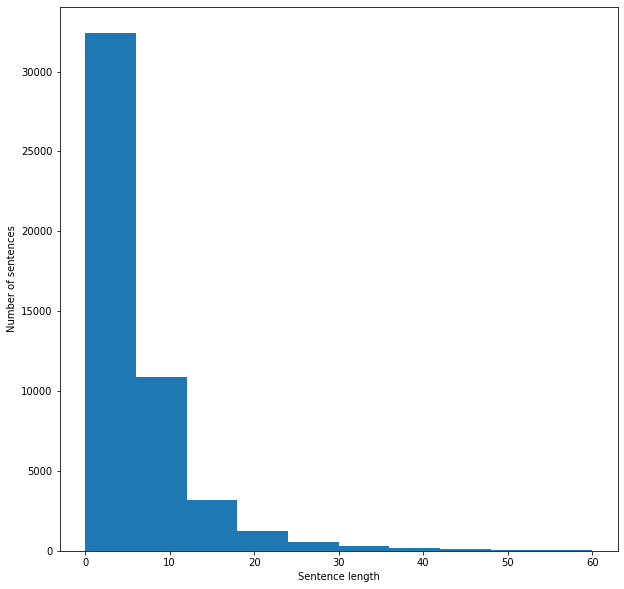

In [5]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10)) 
plt.xlabel('Sentence length')
plt.ylabel('Number of sentences')
plt.hist(sentence_lengths, range = [0, 60])
plt.show()

In [29]:
#find out the ost frequent words that appeared accross different sentiment categories
from nltk import FreqDist

dataset['average_sentiment'] = dataset[['bert_sentiment', 'vader_sentiment', 'textblob_sentiment']].mean(axis=1)

pos_freq_dic=FreqDist(dataset["translated_comment_preprocessed"][dataset['average_sentiment'] >= 8])
neg_freq_dic=FreqDist(dataset["translated_comment_preprocessed"][dataset['average_sentiment'] <= 4])

# Display the most common words
print("Word frequency for positive sentiment:")
print(pos_freq_dic.most_common(100))
print()
print("Word frequency for negative sentiment:")
print(neg_freq_dic.most_common(100))
print()

Word frequency for positive sentiment:
[('satisfied', 269), ('im happy', 120), ('friendly helpful', 65), ('pleased', 50), ('great help', 48), ('always satisfied', 31), ('super', 31), ('completely satisfied', 29), ('satisfied everything', 28), ('satisfied essent', 28), ('great satisfaction', 26), ('good help', 25), ('im satisfied', 23), ('friendly', 22), ('good', 21), ('kindly helped', 21), ('good service', 18), ('friendly clear', 15), ('everything great', 14), ('friendly knowledgeable', 14), ('satisfied eon', 13), ('easy', 13), ('good friendly help', 13), ('helpful friendly', 12), ('satisfied service', 12), ('quick easy', 12), ('great company', 12), ('great', 12), ('fast good help', 12), ('got good help', 12), ('happy', 10), ('easy use', 10), ('pleasant meeting', 10), ('super service', 10), ('excellent', 9), ('excellent communication', 9), ('great service', 9), ('friendly help', 9), ('customer praise smooth uncomplicated process far', 9), ('best', 9), ('perfect', 9), ('clear friendly',

In [30]:
#find out the most frequent words that appeared accross different customer types
from nltk import FreqDist

detractors_freq_dic=FreqDist(dataset["translated_comment_preprocessed"][dataset['customer_type'] == "detractors"])
passives_freq_dic=FreqDist(dataset["translated_comment_preprocessed"][dataset['customer_type'] == "passives"])
promoters_freq_dic=FreqDist(dataset["translated_comment_preprocessed"][dataset['customer_type'] == "promoters"])

# Display the most common words
print("Word frequency for promoters:")
print(promoters_freq_dic.most_common(100))
print()
print("Word frequency for detractors:")
print(detractors_freq_dic.most_common(100))
print()
print("Word frequency for passives:")
print(passives_freq_dic.most_common(100))


Word frequency for promoters:
[('satisfaction', 1121), ('satisfied', 569), ('everything ok', 153), ('good service', 120), ('im happy', 107), ('no problem', 93), ('good', 93), ('speed', 89), ('ok', 88), ('satisfied service', 85), ('reliability', 81), ('im satisfied', 65), ('never problem', 58), ('right', 58), ('satisfaction service', 54), ('fast processing', 49), ('everything fine', 46), ('well helped', 46), ('good communication', 45), ('see', 44), ('pleased', 39), ('overall satisfaction', 38), ('absolute satisfaction', 38), ('invoice come time', 38), ('friendly helpful', 37), ('trustworthy', 37), ('professionalism', 35), ('clear', 34), ('good cooperation', 33), ('desire', 33), ('no', 33), ('processing speed', 32), ('quick action', 32), ('get time', 32), ('satisfied customer', 31), ('satisfied everything', 31), ('everything went well', 30), ('great help', 29), ('satisfied essent', 29), ('completely satisfied', 28), ('super', 27), ('maximum satisfaction', 27), ('convenience', 25), ('good

In [31]:
#Get rid of the counts per most common words
positive = set(x[0] for x in pos_freq_dic.most_common(100))
negative = set(x[0] for x in neg_freq_dic.most_common(100))
promoters = set(x[0] for x in promoters_freq_dic.most_common(100))
detractors = set(x[0] for x in detractors_freq_dic.most_common(100))


In [32]:
print(positive & promoters) #join
print ('\nOut of', len(positive), 'words there are', len(positive & promoters), 'in common')
print()
print(negative & detractors) #join
print ('\nOut of', len(positive), 'words there are', len(negative & detractors), 'in common')
print()

{'satisfied', 'good service', 'im happy', 'everything great', 'satisfied service', 'satisfied customer', 'satisfied essent', 'im satisfied', 'good', 'super', 'pleased', 'great satisfaction', 'customer friendly', 'good cooperation', 'always satisfied', 'nice service', 'good help', 'friendly clear', 'satisfied eon', 'completely satisfied', 'satisfied customer year', 'satisfied company', 'satisfied everything', 'friendly helpful', 'friendly', 'great help'}

Out of 100 words there are 26 in common

{'no clue', 'bad service', 'no answer', 'no contact', 'unreachable', 'not work', 'no idea', 'bad contact', 'never talk', 'dont see', 'question not answered', 'no answer question', 'confusing', 'cena', 'na', 'not helped', 'dont get answer question', 'not getting answer question', 'never', 'problem not solved', 'not reachable', 'cant speak anyone', 'no opinion', 'doesnt work', 'didnt get answer question', 'no', 'no experience yet', 'dissatisfaction', 'difficult reach', 'got no contact', 'not avail

In [33]:
#Flag the reviews that have inconsistent NPS scores and reviews (sentiments)
#For example - filter out words that are used in both Promoters and neg
print(positive & promoters) #join
print ('\nOut of', len(positive), 'words there are', len(positive & promoters), 'in common')
print()
print(negative & detractors)
print ('\nOut of', len(negative), 'words there are', len(negative & detractors), 'in common')
#Inconsiste

{'satisfied', 'good service', 'im happy', 'everything great', 'satisfied service', 'satisfied customer', 'satisfied essent', 'im satisfied', 'good', 'super', 'pleased', 'great satisfaction', 'customer friendly', 'good cooperation', 'always satisfied', 'nice service', 'good help', 'friendly clear', 'satisfied eon', 'completely satisfied', 'satisfied customer year', 'satisfied company', 'satisfied everything', 'friendly helpful', 'friendly', 'great help'}

Out of 100 words there are 26 in common

{'no clue', 'bad service', 'no answer', 'no contact', 'unreachable', 'not work', 'no idea', 'bad contact', 'never talk', 'dont see', 'question not answered', 'no answer question', 'confusing', 'cena', 'na', 'not helped', 'dont get answer question', 'not getting answer question', 'never', 'problem not solved', 'not reachable', 'cant speak anyone', 'no opinion', 'doesnt work', 'didnt get answer question', 'no', 'no experience yet', 'dissatisfaction', 'difficult reach', 'got no contact', 'not avail

In [34]:
#Create a list
positive_detractors_list = [word for word in positive & detractors]
positive_promoters_list = [word for word in positive & promoters]
negative_promoters_list = [word for word in negative & promoters]
negative_detractors_list = [word for word in negative & detractors]

In [43]:
def extract_keywords(sentence, user_keywords):
    # Convert the sentence to lowercase for case-insensitive matching
    sentence_lower = sentence.lower()

    # Extract keywords from the sentence
    extracted_keywords = [keyword for keyword in user_keywords if keyword.lower() in sentence_lower]   
    
    # Check if there are inconsistencies
    if extracted_keywords:
        return 'inconsistent findings'
    else:
        return 'consistent'
    
import math

# Apply the categorization function to each row for positive sentiment
dataset.loc[dataset['customer_type'] == "detractors", 'flag_inconsistent'] = dataset['translated_comment_preprocessed'][dataset['customer_type'] == "detractors"].apply(lambda x: extract_keywords(x, positive_promoters_list))
# Apply the categorization function to each row for negative sentiment
dataset.loc[dataset['customer_type'] == "promoters", 'flag_inconsistent'] = dataset['translated_comment_preprocessed'][dataset['customer_type'] == "promoters"].apply(lambda x: extract_keywords(x, negative_detractors_list))
# Display the first 20 rows
dataset['diff'] = np.abs(dataset['NPS'] - dataset["average_sentiment"])
# dataset['check'] = False
dataset['check'] = dataset['diff'] > 2
# display(dataset[["NPS", "customer_type","translated_comment_preprocessed", "flag_inconsistent", "bert_sentiment", "vader_sentiment"]][(dataset["flag_inconsistent"]== "inconsistent findings") & (dataset["customer_type"]== "promoters")])
# display(dataset[["NPS", "customer_type","translated_comment_preprocessed", "flag_inconsistent", "average_sentiment", 'check']][(dataset["flag_inconsistent"]== "inconsistent findings") & (dataset["customer_type"]== "detractors")])

dataset[(dataset["flag_inconsistent"]== "inconsistent findings") & (dataset["customer_type"]== "promoters")]['check'].value_counts()

# Apply the categorization function to each row
#dataset['flag_inconsistent'] = dataset['translated_comment_preprocessed'][dataset['customer_type'] == "detractors"].apply(lambda x: extract_keywords(x, positive_words_list))
#dataset['flag_inconsistent'] = dataset['translated_comment_preprocessed'][dataset['customer_type'] == "promoters"].apply(lambda x: extract_keywords(x, negative_words_list))



True     3874
False    1172
Name: check, dtype: int64

In [14]:
dataset.to_excel("temp3.xlsx")


In [15]:
#Flag the reviews that have inconsistent NPS scores and reviews (sentiments)
#For example - filter out words that are used in both Promoters and neg
print(promoters & detractors) #join
print ('\nOut of', len(promoters), 'words there are', len(promoters & detractors), 'in common')
print()
print(negative & promoters)
print ('\nOut of', len(negative), 'words there are', len(negative & promoters), 'in common')
#Inconsiste

{'service', 'ok', 'nee', 'experience', 'satisfied', 'satisfaction', 'good', 'na', 'communication', 'cena', 'see'}

Out of 100 words there are 11 in common

{'no problem', 'no complaints', 'no problems', 'problem solved'}

Out of 100 words there are 4 in common


In [17]:
dataset[["NPS", "customer_type","comment_length"]]

,NPS,customer_type,comment_length
0,8.0,passives,129
1,10.0,promoters,289
2,10.0,promoters,107
3,9.0,promoters,21
4,10.0,promoters,371
...,...,...,...
48993,0.0,detractors,17
48994,10.0,promoters,73
48995,5.0,detractors,157
48996,8.0,passives,86


In [18]:
correlation = dataset["NPS"].corr(dataset["comment_length"])
print(f"Correlation between NPS and comment length: {correlation}")


Correlation between NPS and comment length: -0.23257829532151889


In [19]:
# Assuming 'customer_type' is a column in your DataFrame
customer_types = dataset['customer_type'].unique()

# Create an empty dictionary to store correlation results for each customer type
correlation_results = {}

# Iterate over each customer type and calculate the correlation
for customer_type in customer_types:
    subset = dataset[dataset['customer_type'] == customer_type]
    correlation = subset['NPS'].corr(subset['comment_length'])
    correlation_results[customer_type] = correlation

# Display the results
for customer_type, correlation in correlation_results.items():
    print(f"Correlation for {customer_type}: {correlation}")


Correlation for passives: -0.07511555057425096
Correlation for promoters: 0.009689640919639222
Correlation for detractors: -0.08684802391212029
